In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.8 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sn

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import numpy as np
import pandas as pd


In [8]:
conf_matrix_before_q = np.array(
        [[274, 3, 2, 2, 0, 0, 2, 17],
        [1, 253, 25, 0, 0, 1, 0, 20],
        [3, 24, 261, 1, 0, 2, 0, 9],
        [1, 1, 1, 809, 72, 14, 7, 37],
        [4, 0, 1, 39, 818, 15, 21, 71],
        [5, 0, 18, 4, 6, 790, 15, 65],
        [0, 0, 0, 2, 21, 29, 894, 32],
        [13, 15, 9, 33, 29, 91, 34, 715]])

conf_matrix_after_q = np.array([
    [274, 5, 5, 0, 0, 6, 2, 8],
    [3, 266, 19, 0, 0, 2, 0, 10],
    [0, 14, 278, 0, 0, 1, 0, 7],
    [2, 1, 0, 827, 70, 10, 5, 27],
    [2, 2, 0, 40, 852, 21, 11, 41],
    [4, 0, 19, 9, 14, 803, 16, 38],
    [0, 0, 1, 1, 33, 33, 900, 10],
    [9, 15, 14, 45, 50, 129, 33, 644]
])

In [3]:
conf_matrix_before_q = preprocessing.normalize(conf_matrix_before_q, axis=1, norm='l1')
conf_matrix_after_q = preprocessing.normalize(conf_matrix_after_q, axis=1, norm='l1')
conf_matrix_after_q

array([[0.91333333, 0.01666667, 0.01666667, 0.        , 0.        ,
        0.02      , 0.00666667, 0.02666667],
       [0.01      , 0.88666667, 0.06333333, 0.        , 0.        ,
        0.00666667, 0.        , 0.03333333],
       [0.        , 0.04666667, 0.92666667, 0.        , 0.        ,
        0.00333333, 0.        , 0.02333333],
       [0.00212314, 0.00106157, 0.        , 0.87791932, 0.07430998,
        0.01061571, 0.00530786, 0.02866242],
       [0.00206398, 0.00206398, 0.        , 0.04127967, 0.87925697,
        0.02167183, 0.01135191, 0.04231166],
       [0.00442968, 0.        , 0.02104097, 0.00996678, 0.01550388,
        0.88925803, 0.01771872, 0.04208195],
       [0.        , 0.        , 0.00102249, 0.00102249, 0.03374233,
        0.03374233, 0.9202454 , 0.01022495],
       [0.00958466, 0.01597444, 0.01490948, 0.04792332, 0.05324814,
        0.13738019, 0.03514377, 0.685836  ]])

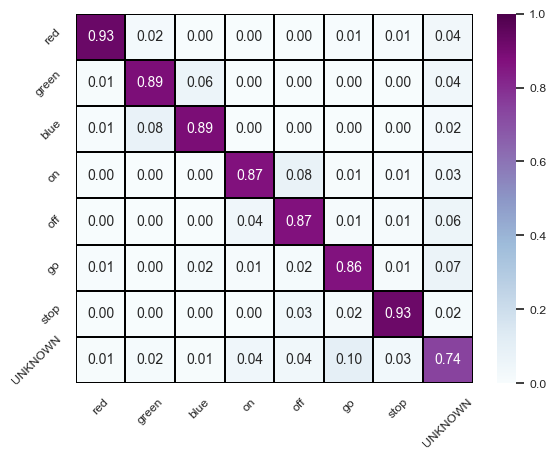

In [4]:
df_cm = pd.DataFrame(conf_matrix_before_q, ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'], ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'])
sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

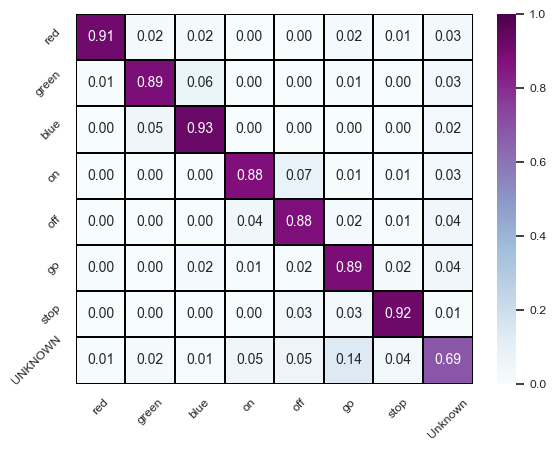

In [5]:
df_cm = pd.DataFrame(conf_matrix_after_q, ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'UNKNOWN'], ['red', 'green', 'blue', 'on', 'off', 'go', 'stop', 'Unknown'])
sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [6]:
# True labels and predicted labels for a binary classification problem
y_true = np.repeat(np.arange(conf_matrix_before_q.shape[0]), conf_matrix_before_q.shape[1])
y_pred = np.tile(np.arange(conf_matrix_before_q.shape[1]), conf_matrix_before_q.shape[0])

# Compute precision, recall, and f1-score using sklearn.metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3292\4047342663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')


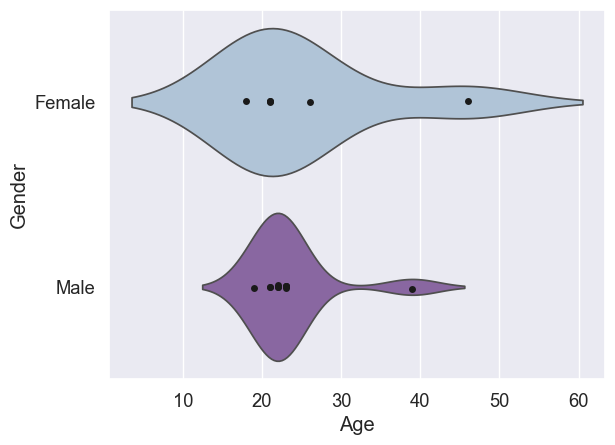

In [7]:
data = {
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Age': [26, 23, 22, 21, 22, 22, 46, 23, 21, 23, 21, 23, 39, 21, 18, 19, 21]
}
sn.set(font_scale=1.2)


sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')
sn.stripplot(data=data, x="Age", y="Gender", jitter=0.01, color='k')

plt.show()